In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Load the two CSV files into DataFrames
rental_inventory_df = pd.read_csv('../Data File Repository/Rental_Inventory_DF.csv')
yearly_median_rent_df = pd.read_csv('../Data File Repository/Yearly_Median_Rent_DF.csv')


In [3]:
# Rename columns in rental_inventory_df
rental_inventory_columns = {'Borough': 'Borough'}
rental_inventory_columns.update({
    str(year): f"{year} Total Rentals" for year in range(2010, 2024)
})
rental_inventory_df.rename(columns=rental_inventory_columns, inplace=True)


In [4]:
# Rename columns in yearly_median_rent_df
yearly_median_rent_columns = {'Borough': 'Borough'}
yearly_median_rent_columns.update({
    str(year): f"{year} Median Rent" for year in range(2010, 2024)
})
yearly_median_rent_df.rename(columns=yearly_median_rent_columns, inplace=True)


In [5]:
# Combine the two DataFrames into a single DataFrame on 'Borough'
combined_df = pd.merge(rental_inventory_df, yearly_median_rent_df, on='Borough')


In [6]:
# Define new column order
new_order = ['Borough']
for year in range(2010, 2024):
    new_order.extend([f"{year} Total Rentals", f"{year} Median Rent"])


In [7]:
# Reorder columns based on the new order
combined_df = combined_df[new_order]


In [22]:
# Print the resulting DataFrame for debugging purposes
combined_df.head()

,Borough,2010 Total Rentals,2010 Median Rent,2011 Total Rentals,2011 Median Rent,2012 Total Rentals,2012 Median Rent,2013 Total Rentals,2013 Median Rent,2014 Total Rentals,...,2019 Total Rentals,2019 Median Rent,2020 Total Rentals,2020 Median Rent,2021 Total Rentals,2021 Median Rent,2022 Total Rentals,2022 Median Rent,2023 Total Rentals,2023 Median Rent
0,Bronx,3087,$1425.00,3674,$1210.75,5419,$1425.00,5462,$1275.00,10815,...,24007,$1829.00,17403,$1850.00,21560,$1851.00,22666,$1985.00,18069,$2191.00
1,Brooklyn,59006,$2033.50,65757,$1743.75,83105,$1900.00,136910,$2106.25,275336,...,487618,$2450.00,629297,$2475.00,580416,$2256.00,359197,$2847.50,296376,$3125.00
2,Manhattan,441207,$2847.50,395231,$3157.00,456434,$3275.00,576566,$3282.50,697721,...,675302,$3500.00,1013629,$3172.50,806908,$3267.50,506199,$4213.00,481479,$4471.50
3,Queens,19596,$1538.25,18369,$1550.00,30753,$1825.00,40171,$1743.75,89093,...,177469,$2010.75,205331,$2025.00,232639,$2004.25,146431,$2300.00,113475,$2500.00
4,Staten Island,55,$nan,57,$nan,139,$1400.00,331,$1487.50,522,...,812,$2022.50,481,$1925.00,627,$1975.00,925,$2050.00,742,$2095.00


In [9]:
# Save the DataFrame as a CSV file in the "Data File Repository" directory one level up
output_folder = '../Data File Repository'
output_file_path = os.path.join(output_folder, 'Combined_Rental_Median_Price_Inventory.csv')
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
combined_df.to_csv(output_file_path, index=False)


In [10]:
# Create two separate DataFrames for Total Rentals and Median Rent
melted_inventory = combined_df.melt(id_vars=['Borough'], value_vars=[f"{year} Total Rentals" for year in range(2010, 2024)], var_name='Year', value_name='Total Rentals')
melted_rent = combined_df.melt(id_vars=['Borough'], value_vars=[f"{year} Median Rent" for year in range(2010, 2024)], var_name='Year', value_name='Median Rent')


In [11]:
# Clean up the Median Rent column and convert to float
melted_rent['Median Rent'] = melted_rent['Median Rent'].replace('[\$,]', '', regex=True).astype(float)


In [23]:
melted_rent.head()

,Borough,Year,Median Rent
0,Bronx,2010,1425.00
1,Brooklyn,2010,2033.50
2,Manhattan,2010,2847.50
3,Queens,2010,1538.25
4,Staten Island,2010,NaN


In [12]:
# Convert 'Year' from '2010 Total Rentals' to '2010' and to int for plotting
melted_inventory['Year'] = melted_inventory['Year'].str.split(' ').str[0].astype(int)
melted_rent['Year'] = melted_rent['Year'].str.split(' ').str[0].astype(int)


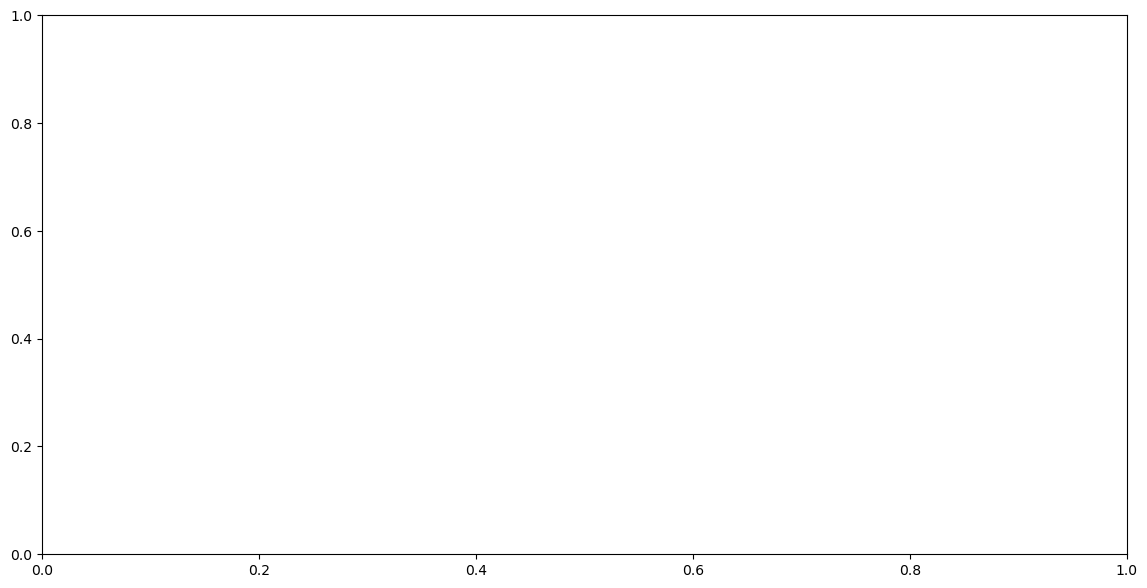

In [13]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(14, 7))


In [14]:
# Scatter plot for Total Rentals with logarithmic scale
colors = ['blue', 'green', 'red', 'purple', 'orange']
for (borough, color) in zip(melted_inventory['Borough'].unique(), colors):
    ax1.scatter(melted_inventory[melted_inventory['Borough'] == borough]['Year'], 
                melted_inventory[melted_inventory['Borough'] == borough]['Total Rentals'], 
                color=color, label=f"{borough} Total Rentals")


In [29]:
# Set Y-axis to logarithmic scale
ax1.set_yscale('log')
ax1.set_ylim('') 

ValueError: too many values to unpack (expected 2)

In [30]:
# Create another axis for the Median Rent
ax2 = ax1.twinx()
for (borough, color) in zip(melted_rent['Borough'].unique(), colors):
    ax2.scatter(melted_rent[melted_rent['Borough'] == borough]['Year'], 
                melted_rent[melted_rent['Borough'] == borough]['Median Rent'], 
                color=color, label=f"{borough} Median Rent", marker='x')


In [26]:
# Labels and titles
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Rentals (Log Scale)', color='blue')
ax2.set_ylabel('Median Rent', color='orange')
ax1.set_title('Total Rentals (Log Scale) and Median Rent per Borough per Year')


Text(0.5, 1.0, 'Total Rentals (Log Scale) and Median Rent per Borough per Year')

In [27]:
# Create combined legend for both plots
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

In [28]:
# Show plot with grid
ax1.grid(True)
plt.show()